# Intro to Scientific Computing

### Homework 4

NAMES:  Andres Duarte, Andrea Antoni

DATE:  4/29/16

## Earthquakes!

In this problem, we'll work with a data set from the following data source from the USGS:

http://earthquake.usgs.gov/data/centennial/

According to the USGS website, The Centennial Catalog (Engdahl and Villaseñor, 2002) (2.75MB PDF) is a global catalog of locations and magnitudes of instrumentally recorded earthquakes from 1900 to 2008. It is being periodically updated as new arrival time data for recent years become available.

This is a catalog of large earthquakes, created with the purpose of giving a realistic picture of the seismicity distribution in the Earth. It has been assembled by combining existing catalogs, reducing all available magnitudes for each earthquake to a common, corrected magnitude (same magnitudes as List of "Preferred Magnitudes of Selected Significant Earthquakes"-Word file), and relocating the earthquakes with available arrival time data.

For recent years (1964–present) a cut-off magnitude of 5.5 has been chosen for the catalog, and the catalog is complete down to that threshold. For the period prior to 1964 (also referred to as "historical instrumental" or simply "historical" period) the cut-off considered is magnitude 6.5. Between the 1930's and 1963 the catalog is complete to te magnitude 6.5 threshold, but prior to that, the catalog is only complete down to magnitude 7.0.

We have downloaded the full file and reformatted it into a .csv format. The lines of the file have the following column headers:

date+time stamp, ignore, latitude (deg), longitude (deg), Earthquake depth (km), Earthquake Magnitude (Richter)

** Download Earthquake.csv and put it in the same folder as this notebook **

In [1]:
#first our standard packages
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
from astropy.io import ascii

#then the packages we'll need to deal with dates
import dateutil.parser as dparser
from datetime import *

### a) Read in the data

Use `ascii.read` to read data from the .csv file into an `astropy` Table object. Print the column names of your new Table (check the astropy Table documentation if you're not sure how to do that).  Note that the units for each column are given in the description above. 

In [2]:
data = ascii.read('Earthquakes.csv')
print data.colnames

['date_string', 'ignore', 'latitude', 'longitude', 'EQ_depth', 'EQ_magnitude']


### b) Convert dates 

Add a new column in which you parse the date_string to a datetime object using `dparser.parse`. This can be accomplished either with `map` or with a `for` loop over entries in the table.

Print the zeroth entry in your new column. It should be a datetime object.

In [3]:
# Convert each date from the "date_string" column to a datetime object and store in a new column called "datetime"
# The date_string column is a numpy array, so we use "map" to apply dparser.parse to all of the elements in the array
# and map returns a new array of the converted values

data['datetime'] = map(dparser.parse,data['date_string'])

In [4]:
# Here we are confirming that the elements in our "datetime" column are datetime objects
data['datetime'][0]

datetime.datetime(1900, 1, 5, 19, 0)

### c) The big one
What was the magnitude of the largest Earthquake recorded on Earth during the 20th Century?

In [5]:
# big_one is the maximum value in the EQ_magnitude column
# max is a build-in numpy function

big_one = max(data['EQ_magnitude'])
print "The largest magnitude quake was",big_one, "Rickter"

The largest magnitude quake was 9.6 Rickter


### d) The big one, part II
Using data selection techniques, find: When did the largest Earthquake occur? What was it's depth?

In [6]:
index = (data["EQ_magnitude"] == big_one)
data[index]

print "The largest earthquake occured on May 22, 1960 at 7:11 PM.\nIt's depth was 35.0 km."

The largest earthquake occured on May 22, 1960 at 7:11 PM.
It's depth was 35.0 km.


### e) Full distribution
Construct a histogram that shows the frequency of Earthquakes of different magnitudes in the entire dataset. The x-axis should run from M=5.5 to M=9.5, the axes should be labeled, and the histogram should contain 40 bins.

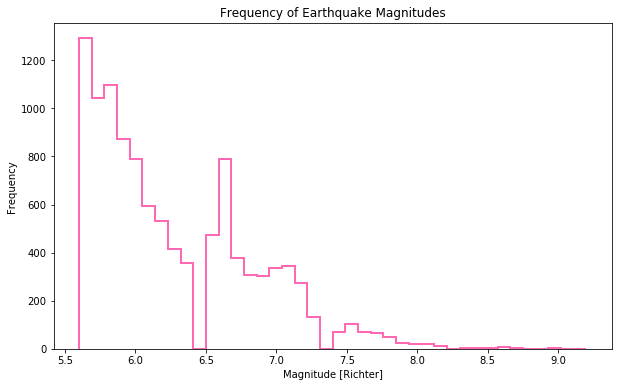

In [15]:
figure(figsize=(10,6))

mags = ( (data['EQ_magnitude'] > 5.5) & (data['EQ_magnitude'] < 9.5)  )
hist( data['EQ_magnitude'][mags], bins=40,histtype='step',color="HotPink",lw=2)
xlabel('Magnitude [Richter]')
ylabel('Frequency')
title('Frequency of Earthquake Magnitudes')
show()

### f) Magnitude vs Depth
Make a plot of Earthquake magnitude vs. depth (using points -- it should be a "scatter" plot). Use transparency for the individual points so that the amount of overlap can be sensed. Remember to label your axes. Try a log-scale on the depth-axis. 

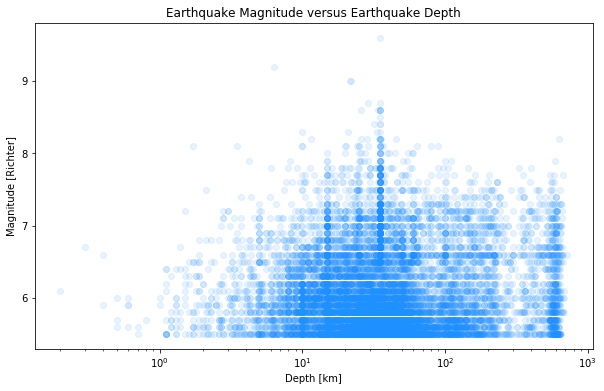

In [8]:
figure(figsize=(10,6))

plot(data['EQ_depth'],data['EQ_magnitude'],'o',alpha=.1,color='DodgerBlue')

xlabel('Depth [km]')
ylabel('Magnitude [Richter]')
xscale('log')
title('Earthquake Magnitude versus Earthquake Depth')

### g) Median depths
What is the median depth for Earthquakes with magnitude 8 or larger? How does this compare to the median depth of all the Earthquakes in the table?

In [9]:
mag8 = (data['EQ_magnitude']  >= 8)

print "Median of magnitude 8 or larger is", median( data['EQ_magnitude'][mag8] )

print "Median of all quakes is", median( data['EQ_magnitude'] )


Median of magnitude 8 or larger is 8.1
Median of all quakes is 6.0


### h) Waiting for  an 8 ...
What was the largest length of time between two successive magnitude 8 (or larger) earthquakes? What was the shortest amount of time between two magnitude 8 earthquakes? (hint: The numpy function "diff" may be useful to you here). 

In [10]:
times = data['datetime'][mag8]

time_differences = diff(times)

print "The largest time between successive mag 8 (or larger) quakes was", max(time_differences)
print "The shortest time was", min(time_differences)


The largest time between successive mag 8 (or larger) quakes was 2147 days, 4:00:00
The shortest time was 0:29:00


### i) GET IT ON THE GLOBE!
The following code imports a useful package called basemap, which is a library of mapping methods.

Try this code snippet to produce a basic map of the earthquake locations.

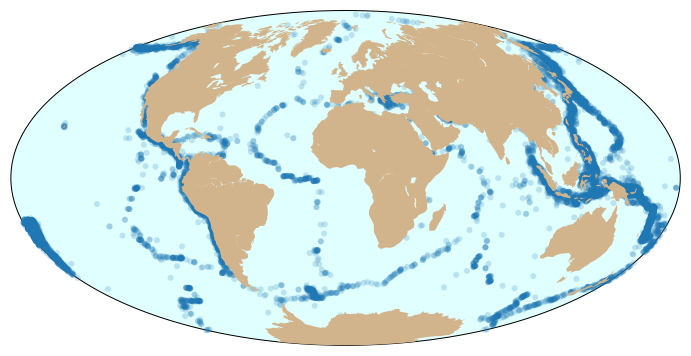

In [31]:
from mpl_toolkits.basemap import Basemap
figure(figsize=(12,8))
m = Basemap(projection='hammer',lon_0=0)

x, y = m(data['longitude'],data['latitude'])

m.drawmapboundary(fill_color='LightCyan')
m.fillcontinents(color='Tan',lake_color='LightCyan')
m.scatter(x,y,marker='o',
          alpha=0.2,
          edgecolor='None')

### j) An even better map!

Modify the above block of code to map the distribution of ** magnitude 6 and larger earthquakes **, 
 - with log10 of earthquake depths shown as point color and
 - point size proportional to earthquake magnitudes  (look at the documentation of `scatter` to learn how to do these). 
 - Add a colorbar to the plot. 
 - Center the view from above the International Date Line.

Look at the matplotlib colormap documentation and choose a colormap for your scatter plot that you think looks good.  Also feel free to change the ocean and continent colors. 

In [32]:
mag6 = (data['EQ_magnitude'] >=6.0)
longitude6 = data['longitude'][mag6]
latitude6 = data['latitude'][mag6]
magnitudes6 = data['EQ_magnitude'][mag6]
depths6 = log10(data['EQ_depth'][mag6])

C:\Users\andre\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [13]:
from matplotlib import cm

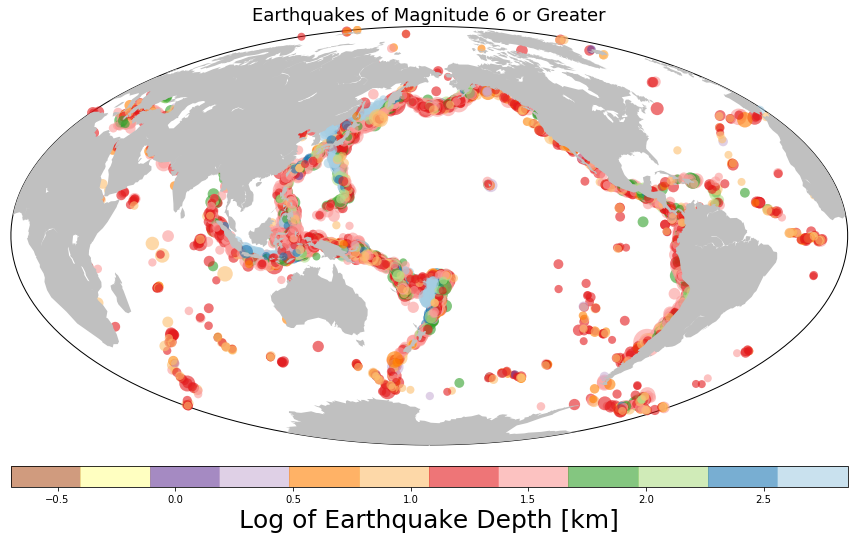

In [39]:
from mpl_toolkits.basemap import Basemap

figure(figsize=(15,10))
m = Basemap(projection='hammer',lon_0=180)

x, y = m(longitude6 ,latitude6)

m.drawmapboundary(fill_color='White')
m.fillcontinents(color='Silver',lake_color='White')
sp = m.scatter(x,y,marker='o',
          alpha=0.6,
          edgecolor='None',
          s = 2**(magnitudes6),
          c = depths6,
          #norm = Normalize(vmin = 0.0, vmax = 1.0),
          cmap = get_cmap('Paired_r')
          )
cb = m.colorbar(sp,location='bottom', pad='5%')
cb.set_label('Log of Earthquake Depth [km]',fontsize=25)
title("Earthquakes of Magnitude 6 or Greater", fontsize=18)

## Optional: More fun with maps! 

Look at the 'basemap' documentation. Did we pick a reasonable projection? How does our data look plotted in some of the other projections? Experiment with these, or with zooming in on a region of the world. The data are closely packed along the pacific rim -- try making some maps zoomed in on those regions.  
